In [1]:
import os
import pandas as pd
import numpy as np
from collections import Counter

from heapq import heappop, heappush #alberi binari

## --- Day 1: Sonar Sweep ---

In [49]:
def day1(data): 
    l = data[0].to_list()
    s = 0
    prev = 0
    actual = 0

    for i in range(len(l)):
        if(i+2<len(l)):
            actual = l[i] + l[i+1] + l[i+2]
            if(actual>prev and i!=0):
                s+=1
            prev = actual

    print('There are',s,'sums that are larger than the previous sum.')

data = pd.read_csv("Data/1_sonar_sweep.csv", header=None)
day1(data)

There are 1618 sums that are larger than the previous sum.


## --- Day 2: Dive! ---

In [ ]:
class Submarine:
    
    def __init__(self):
        self.horizontal = 0
        self.depth      = 0
        self.aim        = 0
    
    def forward(self, x):
        self.horizontal += x
        self.depth += x * self.aim
        
    def down(self, x):
        self.aim += x
    
    def up(self, x):
        self.aim -= x
        
    def sorter(self, movement, x):
        
        if(movement=='down'):
            self.down(x)
        if(movement=='forward'):
            self.forward(x)
        if(movement=='up'):
            self.up(x)
        
    def position(self):
        
        return self.horizontal * self.depth

In [64]:
def day2(data):
    
    sub = Submarine()
    
    for i in range(data.shape[0]):
        movement = data.iloc[i]['movement']
        x = data.iloc[i]['val']
    
        sub.sorter(movement, x)
    
    return sub.position()

data = pd.read_csv("Data/2_dive.csv", sep=" ")
res = day2(data)
print(res)

2086261056


## --- Day 3: Binary Diagnostic ---

### --- Part 1 ---

In [186]:
def day3_part1(data):
    digit = pd.DataFrame([list(x) for x in data['digits']]).astype(int)

    gamma_rate = ''

    for i in digit.columns:
        s = digit[i].sum()
        if(s > len(digit)/2):
            gamma_rate += str(1)
        else:
            gamma_rate += str(0)

    gamma_rate 
    opposite = { '0':'1', '1':'0'}
    epsilon_rate = ''.join([opposite[c] for c in gamma_rate])

    return int(gamma_rate,2) * int(epsilon_rate,2) 
    
data = pd.read_csv("Data/3_binary_diagonstic.csv", dtype = str)

power_consumption = day3_part1(data)
print("Power consumption:", power_consumption)

Power consumption: 198


### --- Part 2 ---

In [243]:
import operator

def get_truth(inp, relate, cut):    
    return relate(inp, cut)

def bit_criteria(df, operator):
    digit = df.copy()
    
    for i in digit.columns:
        s = digit[i].sum()
        if get_truth(s, operator, len(digit)/2):
            digit = digit[digit[i]==1]
        else:
            digit = digit[digit[i]==0]

        if(len(digit)==1):
            rating = ''.join(str(c) for c in digit.iloc[0])
            return int(rating, 2)
        

In [244]:
def day3_part2(data):
    digit = pd.DataFrame([list(x) for x in data['digits']]).astype(int)
    
    oxygen_generator_rating = bit_criteria(digit, operator.ge)
    co2_scrubber_rating     = bit_criteria(digit, operator.lt)
    life_support_rating     = oxygen_generator_rating * co2_scrubber_rating
    
    return life_support_rating
    
data = pd.read_csv("Data/3_binary_diagonstic.csv", dtype = str)
life_support_rating = day3_part2(data)
print("Life Support Rating:", life_support_rating)

Life Support Rating: 6940518


## --- Day 4: Giant Squid ---

In [2]:
def day4(file):
    with open (file, "r") as myfile: all_lines = myfile.read().splitlines()

    matrices = [y for y in all_lines if y != '']
    chunks = [matrices[x:x+5] for x in range(0, len(matrices), 5)]

    cards = [] 
    for chunk in chunks:
        df = pd.DataFrame(chunk)
        df2 = pd.DataFrame(columns = ['a','b','c','d','e'])
        for i in range(len(df)):
            vals = df[0].str.split(" ")[i]
            vals = [y for y in vals if y != '']
            df2.loc[i] = vals

        cards.append(df2.astype(int))

    return cards

In [3]:
def play(cards, extractions):
    winners = []
    bingo   = []
    for number in extractions:
        for card in cards:
            card.replace(number, 0, inplace=True)
            cols_sum = list(card.sum()  == 0)
            rows_sum = list(card.sum(1) == 0)
            
            if (True in cols_sum) or (True in rows_sum): 
                card.replace(100, 0, inplace=True)
                winners.append(card.copy()) 
                bingo.append(number * card.sum().sum())
                card[card>=0]=1000
                
    return winners, bingo

In [4]:
from Data._4_numeri_estratti import extractions

In [6]:
cards = day4("Data/4_giant_squid.csv")
cards_cheat = [x.replace(0,100) for x in cards] 
extractions_cheat = [100 if x==0 else x for x in extractions]
winner, score = play(cards, extractions)

print("Winnner card!!! with score,",score[len(score)-1],'\n')
print(winner[len(score)-1])

Winnner card!!! with score, 2634 

    a   b  c   d   e
0   0  60  0  47  63
1   0  90  0   0   0
2  73   0  0   0   0
3   0   0  0   0  35
4  71   0  0   0   0


## --- Day 5: Hydrothermal Venture ---

In [104]:
def day5(lines):
    grid = []
    for i in range(len(lines)):
        grid.append(list([0] * len(lines[0])))

    points = {}
    for line in lines:
        l, r = line.split(' -> ')
        x1, y1 = map(int, l.split(','))
        x2, y2 = map(int, r.split(','))

        if y1 == y2:  # Horizontal line
            print("H:", x1,y1,x2,y2)
            for i in range(min(x1, x2), max(x1, x2)+1):
                points[(y1, i)] = points.get((y1, i), 0) + 1
                # grid[y1][i] += 1

        if x1 == x2:  # Vertical line
            print("V:", x1,y1,x2,y2)
            for i in range(min(y1, y2), max(y1, y2)+1):
                points[(i, x1)] = points.get((i, x1), 0) + 1
                # grid[i][x1] += 1

    # At how many points do at least two lines overlap?
    overlap_count = 0
    for i in points.items():
        if i[1] >= 2:
            overlap_count += 1

    return(overlap_count)

In [107]:
def day5_part2(lines):
    grid = []
    for i in range(len(lines)):
        grid.append(list([0] * len(lines[0])))

    points = {}
    for line in lines:
        l, r = line.split(' -> ')
        x1, y1 = map(int, l.split(','))
        x2, y2 = map(int, r.split(','))

        if y1 == y2:  # Horizontal line
            # print("H:", x1,y1,x2,y2)
            for x in range(min(x1, x2), max(x1, x2)+1):
                points[(y1, x)] = points.get((y1, x), 0) + 1  # get key or return 0
                # grid[y1][x] += 1

        if x1 == x2:  # Vertical line
            # print("V:", x1,y1,x2,y2)
            for y in range(min(y1, y2), max(y1, y2)+1):
                points[(y, x1)] = points.get((y, x1), 0) + 1
                # grid[y][x1] += 1

        if not (x1 == x2 or y1 == y2):  # Diagonal line
            # print("D:", x1,y1,x2,y2)
            dx = x2 - x1
            dy = y2 - y1
            points[(y1, x1)] = points.get((y1, x1), 0) + 1
            # grid[y1][x1] += 1
            while not x1 == x2:
                x1 = x1 + (dx // abs(dx))  # get positive (1) or negative (-1)
                y1 = y1 + (dy // abs(dy))
                points[(y1, x1)] = points.get((y1, x1), 0) + 1
                # grid[y1][x1] += 1

    # At how many points do at least two lines overlap?
    overlap_count = 0
    for i in points.items():
        if i[1] >= 2:
            overlap_count += 1
    
    return overlap_count

In [106]:
lines = open('Data/input/5_input.txt').read().splitlines()
overlap_count = day5(lines)
print("\nOverlap count:",overlap_count)

H: 735 73 316 73
V: 981 566 981 11
V: 631 588 631 910
H: 502 248 774 248
V: 444 815 444 554
V: 734 97 734 210
H: 871 692 368 692
H: 842 261 606 261
H: 332 43 206 43
H: 594 782 127 782
V: 827 741 827 168
V: 299 598 299 588
H: 478 76 607 76
H: 566 447 857 447
H: 354 721 538 721
V: 124 17 124 339
H: 105 595 843 595
H: 683 183 776 183
V: 415 45 415 942
H: 712 297 792 297
H: 495 90 497 90
V: 836 259 836 988
V: 72 648 72 185
V: 809 206 809 538
V: 472 909 472 213
H: 847 162 189 162
V: 178 233 178 777
V: 404 276 404 516
V: 882 429 882 920
H: 33 53 958 53
V: 331 454 331 715
V: 189 544 189 368
H: 194 258 451 258
V: 75 383 75 642
V: 300 330 300 683
H: 649 175 344 175
V: 677 126 677 204
V: 507 948 507 88
V: 343 229 343 677
V: 830 403 830 660
V: 626 651 626 213
V: 828 932 828 487
H: 792 101 216 101
H: 894 846 630 846
H: 911 425 393 425
V: 26 594 26 475
V: 754 287 754 302
H: 105 483 807 483
V: 79 346 79 423
V: 649 234 649 331
V: 908 177 908 817
V: 905 106 905 570
H: 794 802 328 802
V: 367 762 367 52

In [114]:
overlap_lines = day5_part2(lines)
print(f"Overlapping lines: {overlap_lines}")

Overlapping lines: 23864


## --- Day 6: The Treachery of Whales ---

In [14]:
def day6(data, days, flag):
    print(f"Initial state:\t {data}")
    
    lanternfish = np.array(data.copy())
    
    for i in range(days):
        
        lanternfish = lanternfish - 1
        
        if(sum(lanternfish<0) > 0): # c'è almeno un pesce con giorni negativi
            
            borned = sum(lanternfish<0)
            lanternfish = np.append(lanternfish, np.repeat(8, borned)) # nascono nuovi pescetti
            
            lanternfish[lanternfish < 0] = 6
        
        if(flag):    
            print(f"After {i+1} days:\t {lanternfish}")
    
    return len(lanternfish)

In [15]:
test = [3,4,3,1,2]
data = open('Data/input/6_input.txt').read().split(",")
data = [int(x) for x in data]
days = 80

lanternfish = day6(data, days, 0)
print(f"\nLanternfish after {days} days: {lanternfish}")

Initial state:	 [1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 5, 1, 1, 1, 4, 5, 1, 1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 5, 1, 4, 1, 1, 1, 1, 1, 1, 1, 5, 1, 3, 1, 3, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 4, 1, 2, 4, 4, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 4, 3, 1, 1, 1, 1, 1, 1, 1, 5, 1, 3, 1, 4, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 3, 1, 1, 1, 1, 1, 5, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 4, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 5, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 1, 5, 4, 1, 1, 2, 1, 1, 1, 3, 1, 4, 1, 1, 1, 1, 3, 1, 2, 5, 1, 1, 1, 5, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 2, 2, 2, 2, 4, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 4, 2, 1, 4, 1, 1, 1, 1, 1, 5, 1, 1, 4, 2, 1, 1, 2, 5, 4, 2, 1, 1, 1, 1, 4, 2, 3, 5, 2, 1, 5, 1, 3, 1, 1, 5, 1, 1, 4, 5, 1, 1, 1, 1, 4]

Lanternfish after 80 days: 390923


In [11]:
def count_fish(school):
    fish_age = {}
    for c in range(9):
        fish_age[c] = school.count(c)
    return fish_age

def next_day():
    new_fish = fish_age[0]
    for c in range(0, 8):
        fish_age[c] = fish_age[c+1]
    fish_age[8] = new_fish
    fish_age[6] += new_fish


def simulate(days):
    for day in range(days+1):
        print(f"Day {day}\t Total fish: {sum(fish_age.values())}")
        next_day()

fish_age = count_fish(data)
simulate(256)

Day 0	 Total fish: 300
Day 1	 Total fish: 300
Day 2	 Total fish: 507
Day 3	 Total fish: 533
Day 4	 Total fish: 554
Day 5	 Total fish: 578
Day 6	 Total fish: 600
Day 7	 Total fish: 600
Day 8	 Total fish: 600
Day 9	 Total fish: 807
Day 10	 Total fish: 833
Day 11	 Total fish: 1061
Day 12	 Total fish: 1111
Day 13	 Total fish: 1154
Day 14	 Total fish: 1178
Day 15	 Total fish: 1200
Day 16	 Total fish: 1407
Day 17	 Total fish: 1433
Day 18	 Total fish: 1868
Day 19	 Total fish: 1944
Day 20	 Total fish: 2215
Day 21	 Total fish: 2289
Day 22	 Total fish: 2354
Day 23	 Total fish: 2585
Day 24	 Total fish: 2633
Day 25	 Total fish: 3275
Day 26	 Total fish: 3377
Day 27	 Total fish: 4083
Day 28	 Total fish: 4233
Day 29	 Total fish: 4569
Day 30	 Total fish: 4874
Day 31	 Total fish: 4987
Day 32	 Total fish: 5860
Day 33	 Total fish: 6010
Day 34	 Total fish: 7358
Day 35	 Total fish: 7610
Day 36	 Total fish: 8652
Day 37	 Total fish: 9107
Day 38	 Total fish: 9556
Day 39	 Total fish: 10734
Day 40	 Total fish: 

## --- Day 7: The Treachery of Whales ---

In [108]:
def day7(data, p):
    fuel = {}
    for i in range(max(data)):
        cost = 0
        for j in data:
            diff = abs(j-i)
            
            if(p=='part1'):
                cost += diff
            else:
                cost += int(( diff * (diff + 1) )/ 2)
            
        fuel[i] = cost
        
    return fuel

In [113]:
from Data.input._7 import l

test = [16,1,2,0,4,2,7,1,2,14]

fuel = day7(l, 'part2')
position  = min(fuel, key=fuel.get)
cost = min(fuel.values())
print("The minimum fuel they spent to align their position is", cost, 'at position',position)

The minimum fuel they spent to align their position is 37 at position 2


## --- Day 8: Seven Segment Search ---

In [2]:
def day8(file):

    with open(file, 'r') as aoc_input:
        displays = {}
        for num, line in enumerate(aoc_input.readlines()):
            patterns, outputs = line.split('|')
            patterns = patterns.strip().split(' ')
            outputs = outputs.strip().split(' ')
            displays[num] = (patterns, outputs, {}, {})


    unique = 0
    for key, value in displays.items():
        outputs = value[1]
        for output in outputs:
            if len(output) in (2, 3, 4, 7):
                unique += 1

    output_sum = 0
    for key, value in displays.items():
        patterns, outputs, mappings, segments = value
        unsolved = [set(pattern) for pattern in patterns]

        for pattern in patterns:
            if len(pattern) == 2:
                mappings[1] = set(pattern)
                unsolved.remove(set(pattern))
            elif len(pattern) == 3:
                mappings[7] = set(pattern)
                unsolved.remove(set(pattern))
            elif len(pattern) == 4:
                mappings[4] = set(pattern)
                unsolved.remove(set(pattern))
            elif len(pattern) == 7:
                mappings[8] = set(pattern)
                unsolved.remove(set(pattern))

        # Difference between 1 and 7 gets the top 'a' row
        segments['a'] = mappings[7].difference(mappings[1]).pop()

        # 3 is 5 letter that contains all of 7
        for pattern in unsolved:
            if len(pattern) == 5:
                if len(set(mappings[7]).intersection(pattern)) == 3:
                    mappings[3] = pattern
                    unsolved.remove(pattern)
                    break

        # 6 only 6 letter without all of 7 in it
        for pattern in unsolved:
            if len(pattern) == 6:
                diff_to_7 = mappings[7].difference(pattern)
                if diff_to_7:
                    mappings[6] = pattern
                    segments['c'] = diff_to_7.pop()
                    unsolved.remove(pattern)

        # 5 is 5 letters without 'c' in whereas 2 has it in
        for pattern in unsolved:
            if len(pattern) == 5:
                if segments['c'] in pattern:
                    mappings[2] = pattern
                else:
                    mappings[5] = pattern

        unsolved.remove(mappings[2])
        unsolved.remove(mappings[5])

        # 9 is 5 but with c
        expected_9 = mappings[5].copy()
        expected_9.add(segments['c'])
        for pattern in unsolved:
            if pattern == expected_9:
                mappings[9] = pattern
            else:
                mappings[0] = pattern

        output_value = ''
        for output in outputs:
            for key, value in mappings.items():
                if value == set(output):
                    output_value += str(key)

        output_sum += int(output_value)
    
    return unique, output_sum

In [5]:
unique, output_sum = day8("Data/input/8_input.txt")
# Answer One
print("Part one")
print("Number of times 1, 4, 7 or 8 appear in output values:", unique)

# Answer Two
print("\nPart two")
print("Sum of all output values:", output_sum)

Part one
Number of times 1, 4, 7 or 8 appear in output values: 554

Part two
Sum of all output values: 990964


## --- Day 9: Smoke Basin ---

In [52]:
def get_dim(file):
    with open(file,'r') as f:
        line = f.readlines()
    line = line[0]
    dim = len([x for x in list(line) if x.isdigit()])
    
    return dim

In [53]:
def load_matrix(file, dim):
    m = np.genfromtxt(file, delimiter=np.repeat(1,dim), dtype=None)
    row = m.shape[0]
    col = m.shape[1]

    print(f'The Matrix has {row} rows and {col} columns\n')
    
    return m

In [54]:
def get_low_points(m):

    low_points = []
    
    row = m.shape[0]
    col = m.shape[1]
    
    basin_size = [] 
    
    for i in range(row):
        for j in range(col): 

            # upper left corner
            if i == 0 and j == 0:
                if (m[i][j] < m[i][j+1]) and (m[i][j] < m[i+1][j]):
                    low_points.append(m[i][j])
                    
            # upper right corner
            elif i == 0 and j == col-1:
                if (m[i][j] < m[i][j-1]) and (m[i][j] < m[i+1][j]):
                    low_points.append(m[i][j])
            
            # bottom left corner
            elif i == row-1 and j == 0:
                if (m[i][j] < m[i-1][j]) and (m[i][j] < m[i][j+1]):
                    low_points.append(m[i][j])

            # bottom right corner
            elif i == row-1 and j == col-1:
                if (m[i][j] < m[i][j-1]) and (m[i][j] < m[i-1][j]):
                    low_points.append(m[i][j])

            # first row
            elif i == 0: 
                if (m[i][j] < m[i][j-1]) and (m[i][j] < m[i][j+1]) and (m[i][j] < m[i+1][j]):
                    low_points.append(m[i][j])

            # last row
            elif i == row-1:
                if (m[i][j] < m[i][j-1]) and (m[i][j] < m[i][j+1]) and (m[i][j] < m[i-1][j]):
                    low_points.append(m[i][j])

            # first col 
            elif j == 0: 
                if (m[i][j] < m[i-1][j]) and (m[i][j] < m[i+1][j]) and (m[i][j] < m[i][j+1]):
                    low_points.append(m[i][j])  

            # last col 
            elif j == col-1: 
                if (m[i][j] < m[i-1][j]) and (m[i][j] < m[i+1][j]) and (m[i][j] < m[i][j-1]):
                    low_points.append(m[i][j]) 

            # central point
            else: 
                if (m[i][j] < m[i][j-1]) and (m[i][j] < m[i][j+1]) and (m[i][j] < m[i-1][j]) and (m[i][j] < m[i+1][j]):
                    low_points.append(m[i][j]) 

    return low_points              

In [55]:
def get_risk_level(l):
    return sum([x+1 for x in l])

In [56]:
file = 'Data/input/9.txt'
dim  = get_dim(file)
m    = load_matrix(file, dim)

low_points = get_low_points(m)
risk_level = get_risk_level(low_points)
print(f'There are {len(low_points)} low points and the risk level is {risk_level}')

The Matrix has 100 rows and 100 columns

There are 237 low points and the risk level is 554


### for part b

In [57]:
"""
Problem 9 of the Advent-of-Code 2019
"""
from typing import Any, Dict, List, Optional, Set, Tuple
from functools import reduce


def read_inputs(filename: str) -> List[Any]:
    inputs = []
    with open(filename, "r") as fp:
        for line in fp:
            inputs.append([int(x) for x in line.strip()])
    return inputs


def get_point(inputs, x: int, y: int) -> Optional[None]:
    if x < 0 or y < 0 or x >= len(inputs) or y >= len(inputs[0]):
        return None
    return inputs[x][y]


def part_a(inputs) -> int:
    s = 0
    for x in range(len(inputs)):
        for y in range(len(inputs[0])):
            if is_lowest_point(inputs, x, y):
                s += inputs[x][y] + 1
    return s


def is_lowest_point(inputs, x, y) -> bool:
    return inputs[x][y] < min(
        get_point(inputs, x + i, y + j)
        for i, j in [(1, 0), (-1, 0), (0, 1), (0, -1)]
        if get_point(inputs, x + i, y + j) is not None
    )


def get_move_to_lower_point(inputs, x, y):
    p = get_point(inputs, x, y)
    for dx, dy in [(-1, 0), (1, 0), (0, 1), (0, -1)]:
        p2 = get_point(inputs, x + dx, y + dy)
        if (p2 is not None) and (p2 < p):
            return (dx, dy)


def get_end_point_from_start_point(inputs, x, y) -> Tuple[int, int]:
    if inputs[x][y] == 9:
        return (x, y)
    while not is_lowest_point(inputs, x, y):
        dx, dy = get_move_to_lower_point(inputs, x, y)
        x += dx
        y += dy
    return (x, y)


def part_b(inputs) -> int:
    d = {}
    for i in range(len(inputs)):
        for j in range(len(inputs[0])):
            end_point = get_end_point_from_start_point(inputs, i, j)
            d[end_point] = d.get(end_point, 0) + 1
    return reduce(lambda x, y: x * y, list(sorted(d.values(), reverse=True))[0:3])



inputs = read_inputs("Data/input/9.txt")
print(f"Part A: {part_a(inputs)}")
print(f"Part B: {part_b(inputs)}")


Part A: 554
Part B: 1017792


## --- Day 10: Syntax Scoring ---

In [70]:
import statistics

test = ["[({(<(())[]>[[{[]{<()<>>",
"[(()[<>])]({[<{<<[]>>(",
"{([(<{}[<>[]}>{[]{[(<()>",
"(((({<>}<{<{<>}{[]{[]{}",
"[[<[([]))<([[{}[[()]]]",
"[{[{({}]{}}([{[{{{}}([]",
"{<[[]]>}<{[{[{[]{()[[[]",
"[<(<(<(<{}))><([]([]()",
"<{([([[(<>()){}]>(<<{{",
"<{([{{}}[<[[[<>{}]]]>[]]"]

with open("Data/input/10.txt", "r") as f:
    data = f.readlines()

data = [l.replace("\n", "") for l in data]

ipt = data

score = 0
autocomplete_score = []

for i, line in enumerate(ipt):
    line_emptied = False
    while not line_emptied:
        len_line = len(line)
        line = line.replace("()", "")
        line = line.replace("{}", "")
        line = line.replace("<>", "")
        line = line.replace("[]", "")
        if len_line == len(line):
            line_emptied = True
    bad_line = []
    try:
        bad_line.append(line.index(')'))
    except ValueError:
        pass
    try:
        bad_line.append(line.index('}'))
    except ValueError:
        pass
    try:
        bad_line.append(line.index(']'))
    except ValueError:
        pass
    try:
        bad_line.append(line.index('>'))
    except ValueError:
        pass
    if bad_line:
        if line[min(bad_line)] == ')':
            score += 3
        elif line[min(bad_line)] == ']':
            score += 57
        elif line[min(bad_line)] == '}':
            score += 1197
        elif line[min(bad_line)] == '>':
            score += 25137
    else:
        this_autocomplete_score = 0
        for x in line[::-1]:
            this_autocomplete_score = this_autocomplete_score * 5
            if x == "(":
                this_autocomplete_score += 1
            elif x == "[":
                this_autocomplete_score += 2
            elif x == "{":
                this_autocomplete_score += 3
            elif x == "<":
                this_autocomplete_score += 4
        autocomplete_score.append(this_autocomplete_score)
        
print(score)
print(statistics.median(autocomplete_score))


369105
3999363569


## --- Day 11: Dumbo Octopus ---

In [126]:
file = 'Data/test/11.txt'
m    = load_matrix(file, 10)
m

The Matrix has 10 rows and 10 columns



array([[5, 4, 8, 3, 1, 4, 3, 2, 2, 3],
       [2, 7, 4, 5, 8, 5, 4, 7, 1, 1],
       [5, 2, 6, 4, 5, 5, 6, 1, 7, 3],
       [6, 1, 4, 1, 3, 3, 6, 1, 4, 6],
       [6, 3, 5, 7, 3, 8, 5, 4, 7, 8],
       [4, 1, 6, 7, 5, 2, 4, 6, 4, 5],
       [2, 1, 7, 6, 8, 4, 1, 7, 2, 1],
       [6, 8, 8, 2, 8, 8, 1, 1, 3, 4],
       [4, 8, 4, 6, 8, 4, 8, 5, 5, 4],
       [5, 2, 8, 3, 7, 5, 1, 5, 2, 6]])

In [127]:
def increase_energy(m, i, j):
    
    m = m.copy()
    row = m.shape[0]
    col = m.shape[1]
    
    if i==0 and j == 0:    
        m[i+1][j+1] += 1
        m[i+1][j]   += 1
        m[i][j+1]   += 1
        
    elif i==0 and j == col-1: 
        m[i-1][j-1] += 1
        m[i-1][j]   += 1
        m[i][j-1]   += 1
        
    elif i==row-1 and j == 0: 
        m[i-1][j]   += 1
        m[i-1][j+1] += 1
        m[i][j+1]   += 1
    
    elif i==row-1 and j == col-1: 
        m[i-1][j]   += 1
        m[i-1][j-1] += 1
        m[i][j-1]   += 1
        
    elif i==0: 
        m[i][j-1]   += 1
        m[i-1][j-1] += 1
        m[i+1][j]   += 1 
        m[i+1][j+1] += 1
        m[i][j+1]   += 1
    
    elif j==0: 
        m[i-1][j]   += 1
        m[i-1][j+1] += 1
        m[i][j+1]   += 1 
        m[i+1][j+1] += 1
        m[i+1][j]   += 1
        
    elif i==row-1: 
        m[i][j-1]   += 1
        m[i-1][j-1] += 1
        m[i][j-1]   += 1 
        m[i+1][j+1] += 1
        m[i][j+1]   += 1
        
    elif j==col-1: 
        m[i-1][j]   += 1
        m[i-1][j-1] += 1
        m[i][j-1]   += 1 
        m[i+1][j-1] += 1
        m[i+1][j]   += 1
        
    else: 
        m[i-1][j-1] += 1
        m[i-1][j]   += 1
        m[i-1][j+1] += 1 
        m[i][j+1]   += 1
        m[i+1][j+1] += 1
        m[i+1][j]   += 1
        m[i+1][j-1] += 1
        m[i-1][j] += 1
        
    return m

In [128]:
def increase_total_energy(m, values):
    for i in values:
        row = i[0]
        col = i[1]
        m = increase_energy(m, row, col)
    
    return m

In [147]:
import numpy as np

with open('Data/input/11.txt', 'r') as f:
    data = f.read()

A = np.array([[int(i) for i in l] for l in data.split('\n')])

flashes = 0

for idx in range(100):
    A += 1
    flashed = A < 0

    while True:
        flashing = A >= 10
        if not flashing.sum():
            break

        flashed |= flashing
        F = np.pad(flashing, 1).astype(int)
        A += F[0:-2, 0:-2] + F[1:-1, 0:-2] + F[2:, 0:-2] +\
            F[0:-2, 1:-1] + F[1:-1, 1:-1] + F[2:, 1:-1] +\
            F[0:-2, 2:] + F[1:-1, 2:] + F[2:, 2:]

        A[flashed] = 0

    flashes += flashed.sum()

    if idx+1 == 100:
        print('Part 1:', flashes)
    if flashed.all():
        print('Part 2:', idx+1)
        break

Part 1: 1743


## --- Day 12: Passage Pathing ---

In [2]:
from pyvis.network import Network
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
#net = Network()
G = nx.Graph()

In [4]:
with open("Data/test/12.txt",'r') as f:
    lines = f.readlines()

In [5]:
edges = [s.replace('\n','') for s in lines]
edges

['start-A', 'start-b', 'A-c', 'A-b', 'b-d', 'A-end', 'b-end']

In [6]:
nodes = []
for node in edges:
    n1 = node.split('-')[0]
    n2 = node.split('-')[1]
    
    if n1 not in nodes:
        nodes.append(n1)
        
    if n2 not in nodes:
        nodes.append(n2)
nodes

['start', 'A', 'b', 'c', 'd', 'end']

In [7]:
for node in nodes:
    G.add_node(node)

In [8]:
for edge in edges:
    n1 = edge.split('-')[0]
    n2 = edge.split('-')[1]
    
    G.add_edge(n1, n2)

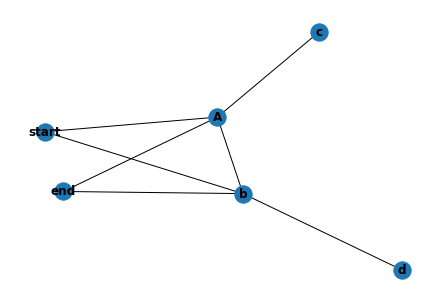

In [31]:
nx.draw(G,with_labels=True, font_weight='bold')

In [9]:
for path in nx.all_simple_paths(G, 'start', 'end',cutoff=1000000):
    print(path)

['start', 'A', 'b', 'end']
['start', 'A', 'end']
['start', 'b', 'A', 'end']
['start', 'b', 'end']


In [60]:
from collections import defaultdict


def dfs(start, seen, part_2=False):
    if start == "end":
        return 1

    s = 0
    for end in d[start]:
        if end not in seen:
            tmp = {end} if end.islower() else set()
            s += dfs(end, seen | tmp, part_2)
        elif part_2 and end != "start":
            s += dfs(end, seen, False)

    return s


with open("Data/input/12.txt") as f:
    data = f.readlines()

d = defaultdict(set)
for line in data:
    start, end = line.strip().split("-")
    d[start].add(end)
    d[end].add(start)
    
print(dfs("start", {"start"}))
print(dfs("start", {"start"}, True))

3761
99138


## --- Day 13: Transparent Origami ---

In [70]:
with open("Data/input/13.txt") as f:
    points, folds = f.read().strip().split("\n\n")

points = {tuple(map(int, line.split(","))) for line in points.split("\n")}
for i, line in enumerate(folds.split("\n")):
    coordinate, n = line.split()[-1].split("=")
    n = int(n)
    for x, y in list(points):
        points.remove((x, y))
        if coordinate == "x" and x > n:
            x = 2 * n - x

        if coordinate == "y" and y > n:
            y = 2 * n - y

        points.add((x, y))

    if i == 0:
        print(len(points))

X, Y = zip(*points)
for y in range(max(Y) + 1):
    for x in range(max(X) + 1):
        print(" #"[(x, y) in points], end="")

    print()

678
####  ##  #### #  # #    #  # #### ####
#    #  # #    #  # #    #  #    # #   
###  #    ###  #### #    ####   #  ### 
#    #    #    #  # #    #  #  #   #   
#    #  # #    #  # #    #  # #    #   
####  ##  #    #  # #### #  # #### #   


## --- Day 14: Extended Polymerization ---

In [2]:
def get_data_day14(day):
    with open("Data/input/"+str(day)+".txt",'r') as f:
        lines = f.readlines()
    
    template = lines[0].replace('\n','')
    
    rules = {}

    for i in range(2,len(lines)):
        reaction = lines[i].replace('\n','').split(' -> ')
        pair = reaction[0]
        poly = reaction[1]

        rules[pair] = poly
    
    return template, rules

In [3]:
def get_polymer(template):
    polymer = template[0]
    i=0

    while i < len(template)-1:
        
        pair = template[i:i+2]
        res  = rules[pair]
        polymer += res + pair[1]
        i+=1
    
    return polymer

In [4]:
def get_result(s):
    c = list(
        Counter(s).values() )
    
    return max(c) - min(c)

In [5]:
template, rules = get_data_day14(14)
print("Template",':'.rjust(5),template.rjust(4),'\n')
steps = 10
poly = template

for i in range(steps):
    poly = get_polymer(poly)
    #print("After step",i+1,':',poly,'\n')
    #print(i+1)
    
result = get_result(poly)
print("Result:", result)

Template     : CNBPHFBOPCSPKOFNHVKV 

Result: 2170


In [9]:
from collections import Counter

with open("Data/input/14.txt") as f:
    molecule, lines = data = f.read().strip().split("\n\n")

d = dict(line.split(" -> ") for line in lines.split("\n"))

counter = Counter([molecule[i:i+2] for i in range(len(molecule) - 1)])
for step in range(1, 41):
    new_counter = Counter()
    for pair in counter:
        left, right = pair
        mid = d[pair]
        new_counter[left + mid]  += counter[pair]
        new_counter[mid + right] += counter[pair]

    counter = new_counter
    if step in [10, 40]:
        char_counter = Counter()
        for pair in counter:
            left, right = pair
            char_counter[left] += counter[pair]
        char_counter[molecule[-1]] += 1

        print(max(char_counter.values()) - min(char_counter.values()))

2170
2422444761283


## --- Day 15: Chiton ---

In [2]:
def get_dim(file):
    with open(file,'r') as f:
        line = f.readlines()
    line = line[0]
    dim = len([x for x in list(line) if x.isdigit()])
    
    return dim

def load_matrix(file, dim):
    m = np.genfromtxt(file, delimiter=np.repeat(1,dim), dtype=None)
    row = m.shape[0]
    col = m.shape[1]

    print(f'The Matrix has {row} rows and {col} columns\n')
    
    return m

file = 'Data/test/15.txt'
dim  = get_dim(file)
m    = load_matrix(file, dim)

def get_min_risk(m,i,j):
    if(j==m.shape[1]-1):
        return m[i+1][j], i+1, j
    
    dic  = {}
    
    dic[ m[i][j+1] ] = [i,j+1] 
    dic[ m[i+1][j] ] = [i+1,j]
    min_risk = min(dic.keys())
    pos = dic[min_risk]
        
    return min_risk, pos[0], pos[1]

best_path = []
i = 0
j = 0

while(i<m.shape[0] and j<m.shape[1]):
    
    if(i==j==m.shape[0]-1):
        break
        
    min_risk, i, j = get_min_risk(m,i,j)
    best_path.append(min_risk)
    print(i,j, min_risk)

sum(best_path)

The Matrix has 10 rows and 10 columns

1 0 1
2 0 2
2 1 1
2 2 3
2 3 6
3 3 4
4 3 3
4 4 4
5 4 1
5 5 2
6 5 1
7 5 2
7 6 1
7 7 6
7 8 3
8 8 2
8 9 1
9 9 1


44

In [6]:
from heapq import heappop, heappush

with open("Data/input/15.txt") as f:
    data = [list(map(int, line)) for line in f.read().strip().split("\n")]


def shortest_distance(t):
    heap = [(0, 0, 0)]
    seen = {(0, 0)}
    while heap:
        distance, x, y = heappop(heap)
        if x == t * len(data) - 1 and y == t * len(data[0]) - 1:
            return distance

        for dx, dy in ((0, 1), (0, -1), (1, 0), (-1, 0)):
            x_, y_ = x + dx, y + dy
            if x_ < 0 or y_ < 0 or x_ >= t * len(data) or y_ >= t * len(data):
                continue

            a, am = divmod(x_, len(data))
            b, bm = divmod(y_, len(data[0]))
            n = ((data[am][bm] + a + b) - 1) % 9 + 1

            if (x_, y_) not in seen:
                seen.add((x_, y_))
                heappush(heap, (distance + n, x_, y_))


print(shortest_distance(1))
print(shortest_distance(5))

447
2825


## --- Day 16: Packet Decoder ---

In [11]:
with open('Data/input/16.txt') as f:
    transmission = f.read().strip()
    transmission = list(bin(int(transmission, 16))[2:].zfill(len(transmission) * 4))

VERSION_SUM = 0

def increase_version_sum(version):
    global VERSION_SUM
    VERSION_SUM += version

def prod(i):
    p = 1
    for n in i: p *= n
    return p

def bin_to_dec(b): return int(''.join(b), 2)

def parse(packet):
    version, packet = bin_to_dec(packet[:3]), packet[3:]
    increase_version_sum(version)
    type_id, packet = bin_to_dec(packet[:3]), packet[3:]
    if type_id == 4:
        groups = []
        while True:
            group, packet = packet[:5], packet[5:]
            groups += group[1:]
            if group[0] == '0': break
        return bin_to_dec(groups), packet

    length_type_id = packet.pop(0)
    subrets = []
    if length_type_id == '0':
        length, packet = bin_to_dec(packet[:15]), packet[15:]
        subpacket, packet = packet[:length], packet[length:]
        while subpacket:
            subret, subpacket = parse(subpacket)
            subrets.append(subret)
    else:
        number, packet = bin_to_dec(packet[:11]), packet[11:]
        for _ in range(number):
            subret, packet = parse(packet)
            subrets.append(subret)
    if   type_id == 0: ret = sum(subrets)
    elif type_id == 1: ret = prod(subrets)
    elif type_id == 2: ret = min(subrets)
    elif type_id == 3: ret = max(subrets)
    elif type_id == 5: ret = subrets[0] > subrets[1]
    elif type_id == 6: ret = subrets[0] < subrets[1]
    elif type_id == 7: ret = subrets[0] == subrets[1]
    return ret, packet

print('B', parse(transmission)[0])
print('A', VERSION_SUM)

B 12301926782560
A 960


## --- Day 17: Trick Shot ---

In [13]:
import re

with open("Data/input/17.txt") as f:
    xmin, xmax, ymin, ymax = map(int, re.findall(r"[-\d]+", f.read()))

print(abs(ymin) * abs(ymin + 1) // 2)

velocities = 0
for dx_init in range(min(0, xmin - 1), max(0, xmax + 1)):
    for dy_init in range(ymin, abs(ymin)):
        solved = False
        dx = dx_init
        dy = dy_init
        x = 0
        y = 0
        while y > ymin:
            x += dx
            y += dy
            if dx < 0:
                dx += 1
            if dx > 0:
                dx -= 1
            dy -= 1
            if xmin <= x <= xmax and ymin <= y <= ymax:
                velocities += 1
                break

print(velocities)

3003
940


## --- Day 18: Snailfish ---

In [47]:
with open('Data/input/18.txt') as f:
    lines = [list(i) for i in f.read().splitlines()]

not_numbers = ('[', ']', ',')

def explode(i, l):
    for x in range(i-2, -1, -1): 
        if l[x] not in not_numbers:
            l[x] = str(int(l[x]) + int(l[i]))
            break
    for y in range(i+3, len(l)):
        if l[y] not in not_numbers:
            l[y] = str(int(l[y]) + int(l[i+2]))
            break
    return l[:i-1] + ['0'] + l[i+4:]

def check_explode(l):
    depth = 0
    for i in range(len(l)):
        if depth == 5: return True, explode(i, l)
        if   l[i] == '[': depth += 1
        elif l[i] == ']': depth -= 1
    return False, l

def split(l):
    for i in range(len(l)):
        if l[i] not in not_numbers and int(l[i]) >= 10:
            x = str(int(l[i]) // 2)
            y = str((int(l[i]) + 1) // 2)
            l = l[:i] + ['['] + [x] + [','] + [y] + [']'] + l[i+1:]
            return True, l
    return False, l
    
def add(l1, l2): return ['['] + l1 + [','] + l2 + [']']

def magnitude(l):
    if type(l) == int: return l
    return 3 * magnitude(l[0]) + 2 * magnitude(l[1])

def add_all(lines):
    l = lines[0]
    for l2 in lines[1:]:
        l = add(l, l2)
        while True:
            did_explode = True
            while did_explode:
                did_explode, l = check_explode(l)
            did_split, l = split(l)
            if not did_split: break
    return l

l = eval(''.join(add_all(lines)))

print(magnitude(l))

r2 = 0
for l1 in lines:
    for l2 in lines:
        l = eval(''.join(add_all([l1, l2])))
        r2 = max(magnitude(l), r2)

print(r2)

4057
4683


## --- Day 19: Beacon Scanner ---

In [49]:
with open('Data/input/19.txt') as f:
    scans = [[eval('(' + j + ')') for j in i.splitlines()[1:]] for i in f.read().split('\n\n')]

def orientations(v):
    for i in rotations(v): yield from spins(i)

def spins(v): # barrel roll
    yield v
    yield (v[0], -v[2], v[1])
    yield (v[0], -v[1], -v[2])
    yield (v[0], v[2], -v[1])

def rotations(v): # backflip and 360
    yield v
    yield (v[2], v[1], -v[0])
    yield (-v[0], v[1], -v[2])
    yield (-v[2], v[1], v[0])
    yield (v[1], -v[0], v[2])
    yield (-v[1], v[0], v[2])
    
def check_match(diffs1, diffs2):
    matches = set(diffs1) & set(diffs2)
    if len(matches) >= 11: return matches.pop()

points = scans[0]
translations = []
dones = [0 for i in range(len(scans[1:]))]
while True == True:
    for k, scan in enumerate(scans[1:]):
        if dones[k]: continue
        diffs_points_v  = [[ tuple(points[i][x] -  points[j][x] for x in range(3)) for i in  range(len(points)) if i != j] for j in  range(len(points))]
        for oriented_scanner in zip(*(orientations(i) for i in scan)):
            matches = 0
            diffs_scanner_v = [[tuple(oriented_scanner[i][x] - oriented_scanner[j][x] for x in range(3)) for i in range(len(oriented_scanner)) if i != j] for j in range(len(oriented_scanner) - 10)]
            translation = None
            for i, diffs_points in enumerate(diffs_points_v):
                for j, diffs_scanner in enumerate(diffs_scanner_v):
                    matching_diff = check_match(diffs_points, diffs_scanner)
                    if matching_diff:
                        translation = tuple(points[i][x] - oriented_scanner[j][x] for x in range(3))
                        dones[k] = 1
                        break
                if translation: break
            if translation:
                translations.append(translation)
                for v in oriented_scanner:
                    candidate = tuple(v[x] + translation[x] for x in range(3))
                    if candidate not in points: points.append(candidate)
                break
    print(dones)
    if all(dones): break

print(len(points))

r2 = 0
for translation1 in translations:
    for translation2 in translations:
        r2 = max(r2, sum([abs(translation1[i] - translation2[i]) for i in range(3)]))

print(r2)

[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1]
[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]
[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
462
12158


## --- Day 20: Trench Map ---

In [52]:
with open('Data/input/20.txt') as f:
    algo, lines = f.read().split('\n\n')

algo = algo.replace('#', '1').replace('.', '0')
lines = lines.splitlines()

real_size = len(lines[0])
size = real_size + 102
diff_by_2 = (size - real_size) // 2

def adjacent(m, j, i):
    if j == 0 or i == 0 or j == size-1 or i == size-1: return m[j][i]*9
    return ''.join(m[j-1][i-1:i+2] + m[j][i-1:i+2] + m[j+1][i-1:i+2])

image = []
border = ['0' for i in range(diff_by_2)]
for _ in range(diff_by_2): image.append(['0' for i in range(size)])
for line in lines: image.append(border + list(line.replace('#', '1').replace('.', '0')) + border)
for _ in range(diff_by_2): image.append(['0' for i in range(size)])

def enhance(image):
    new_image = [[None for i in range(size)] for j in range(size)]
    for j in range(size):
        for i in range(size):
            new_image[j][i] = algo[int(adjacent(image, j, i), 2)]
    return new_image

for _ in range(2): image = enhance(image)
print(sum([sum([int(i) for i in line]) for line in image]))

for _ in range(48): image = enhance(image)
print(sum([sum([int(i) for i in line]) for line in image]))

4964
13202


## --- Day 21: Dirac Dice ---

In [22]:
class Player:
    
    def __init__(self, pos):
    
        self.position = pos
        self.score    = 0
        self.rolls    = 0
        
    def get_pos(self):
        return self.position
    
    def get_score(self):
        return self.score
    
    def get_rolls(self):
        return self.rolls
    
    def set_pos(self, pos_):
        pos_ = (self.position + pos_) % 10
        self.position = 10 if pos_==0 else pos_
    
    def set_score(self, score_):
        self.score += self.position
    
    def set_rolls(self, roll):
        self.rolls += roll
    
    def resulting_score(self):
        return self.score * self.rolls

In [38]:
with open('Data/input/21.txt') as f:
    pos1, pos2  = list(map(lambda x: int(x.split(':')[1]), f))

p1 = Player(pos1)
p2 = Player(pos2)
i  = 1
print_flag = 0

while(p1.get_score() < 1000 and p2.get_score() < 1000):
    move = i + (i+1) + (i+2)
    p1.set_pos(move)
    p1.set_score(move)
    
    if print_flag:
        print(f"Player 1 rolls {i}+{i+1}+{i+2} and moves to space {p1.get_pos()} for a total score of {p1.get_score()}\n")
    
    i += 3
    
    if(p1.get_score() >= 1000):
        p1.set_rolls(3)
        p2.set_rolls(3)
        break
    
    move = i + (i+1) + (i+2)
    p2.set_pos(move%10)
    p2.set_score(move%10)
    
    if print_flag:
        print(f"Player 2 rolls {i}+{i+1}+{i+2} and moves to space {p2.get_pos()} for a total score of {p2.get_score()}\n")
    
    i += 3
    
    p1.set_rolls(6)
    p2.set_rolls(6)

if p1.get_score() >=1000:
    print(f"Player 1 wins and the losing player as a score of {p2.resulting_score()}")
else:
    print(f"Player 2 wins and the losing player as a score of {p1.resulting_score()}")

Player 1 wins and the losing player as a score of 518418


In [48]:
from functools import lru_cache

@lru_cache(maxsize=None)
def part_2(player_1, player_2, score_1, score_2):
    if score_2 >= 21:
        return (0, 1)

    wins = [0, 0]
    for die, throws in zip(range(3, 10), (1, 3, 6, 7, 6, 3, 1)):
        new_player_1 = (player_1 + die) % 10
        new_score_1 = score_1 + new_player_1 + 1
        win_2, win_1 = part_2(player_2, new_player_1, score_2, new_score_1)
        wins[0] += win_1 * throws
        wins[1] += win_2 * throws

    return wins


print(max(part_2(pos1 - 1, pos2 - 1, 0, 0)))

116741133558209


## --- Day 22: Reactor Reboot ---

In [55]:
import re
from itertools import chain
from bisect import bisect

with open("Data/input/22.txt") as f:
    data = f.read()[:-1].split("\n")

cuboids = []
for line in data:
    on, other = line.split()
    xmin, xmax, ymin, ymax, zmin, zmax = map(int, re.findall(r"-?\d+", other))
    cuboids.append((on, xmin, xmax + 1, ymin, ymax + 1, zmin, zmax + 1))

_, xmins, xmaxs, ymins, ymaxs, zmins, zmaxs = zip(*cuboids)
X = sorted(set(chain(xmins, xmaxs)))
Y = sorted(set(chain(ymins, ymaxs)))
Z = sorted(set(chain(zmins, zmaxs)))

XA = X[:]
YA = Y[:]
ZA = Z[:]
for i in range(len(X) - 1, 0, -1):
    X[i] -= X[i - 1]
for i in range(len(Y) - 1, 0, -1):
    Y[i] -= Y[i - 1]
for i in range(len(Z) - 1, 0, -1):
    Z[i] -= Z[i - 1]

small_space = set()
space = set()
for on, xmin, xmax, ymin, ymax, zmin, zmax in cuboids:
    for x in range(bisect(XA, xmin) , bisect(XA, xmax)):
        for y in range(bisect(YA, ymin) , bisect(YA, ymax)):
            for z in range(bisect(ZA, zmin),bisect(ZA, zmax)):
                if on == "on":
                    space.add((x, y, z))
                else:
                    space.discard((x, y, z))

    if (
        xmin >= -50
        and xmax <= 50
        and ymin >= -50
        and ymax <= 50
        and zmin >= -50
        and zmax <= 50
    ):
        for x in range(xmin, xmax):
            for y in range(ymin, ymax):
                for z in range(zmin, zmax):
                    if on == "on":
                        small_space.add((x, y, z))
                    else:
                        small_space.discard((x, y, z))

print(len(small_space))
print(sum(X[x] * Y[y] * Z[z] for x, y, z in space))

600458
1320022766394881


In [56]:
from re import findall

with open('Data/input/22.txt') as f:
    lines = f.read().splitlines()

cubes_in = []
ons = []
for line in lines:
    ints = tuple(int(i) for i in findall(r'-?\d+', line))
    cubes_in.append([])
    ons.append(True if line[:2] == 'on' else False)
    for i in range(3):
        cubes_in[-1].append((ints[2*i], ints[2*i+1]))

cubes = []
for cube_in, on in zip(cubes_in, ons):
    #if any([limits[0] > 50 or limits[1] < -50 for limits in cube_in]): continue # add for A
    new_cubes = [cube_in] if on else []
    for cube in cubes:
        if any([cube_in[i][1] < cube[i][0] or cube_in[i][0] > cube[i][1] for i in range(3)]):
            new_cubes.append(cube)
            continue
        if cube_in[0][0] > cube[0][0]:
            new_cubes.append([(cube[0][0], cube_in[0][0] - 1), cube[1], cube[2]])
        if cube_in[0][1] < cube[0][1]:
            new_cubes.append([(cube_in[0][1] + 1, cube[0][1]), cube[1], cube[2]])
        if cube_in[1][0] > cube[1][0]:
            new_cubes.append([(max(cube_in[0][0], cube[0][0]), min(cube_in[0][1], cube[0][1])), (cube[1][0], cube_in[1][0] - 1), cube[2]])
        if cube_in[1][1] < cube[1][1]:
            new_cubes.append([(max(cube_in[0][0], cube[0][0]), min(cube_in[0][1], cube[0][1])), (cube_in[1][1] + 1, cube[1][1]), cube[2]])
        if cube_in[2][0] > cube[2][0]:
            new_cubes.append([(max(cube_in[0][0], cube[0][0]), min(cube_in[0][1], cube[0][1])),
                (max(cube_in[1][0], cube[1][0]), min(cube_in[1][1], cube[1][1])), (cube[2][0], cube_in[2][0] - 1)])
        if cube_in[2][1] < cube[2][1]:
            new_cubes.append([(max(cube_in[0][0], cube[0][0]), min(cube_in[0][1], cube[0][1])),
                (max(cube_in[1][0], cube[1][0]), min(cube_in[1][1], cube[1][1])), (cube_in[2][1] + 1, cube[2][1])])
    cubes = new_cubes

vol = 0
for cube in cubes:
    vol += (cube[0][1] - cube[0][0] + 1) * (cube[1][1] - cube[1][0] + 1) * (cube[2][1] - cube[2][0] + 1)

print(vol)

1334275219162622


## --- Day 23: Amphipod ---

In [57]:
from collections import defaultdict

#############
#01.2.3.4.56#
###7#8#9#a###
  #b#c#d#e#
  #########

coords = {
        0:  (0,  0),
        1:  (1,  0),
        2:  (3,  0),
        3:  (5,  0),
        4:  (7,  0),
        5:  (9,  0),
        6:  (10, 0),
        7:  (2,  1),
        8:  (4,  1),
        9:  (6,  1),
        10: (8,  1),
        11: (2,  2),
        12: (4,  2),
        13: (6,  2),
        14: (8,  2),
        15: (2,  3),
        16: (4,  3),
        17: (6,  3),
        18: (8,  3),
        19: (2,  4),
        20: (4,  4),
        21: (6,  4),
        22: (8,  4)
        }

costs = [[abs(coords[i][0] - coords[j][0]) + abs(coords[i][1] - coords[j][1]) for i in range(23)] for j in range(23)]

passes = [
    [(0,) for i in range(7)] +
    [(1, 7)] +
    [(1, 2, 8)] +
    [(1, 2, 3, 9)] +
    [(1, 2, 3, 4, 10)] +
    [(1, 7, 11)] +
    [(1, 2, 8, 12)] +
    [(1, 2, 3, 9, 13)] +
    [(1, 2, 3, 4, 10, 14)] +
    [(1, 7, 11, 15)] +
    [(1, 2, 8, 12, 16)] +
    [(1, 2, 3, 9, 13, 17)] +
    [(1, 2, 3, 4, 10, 14, 18)] +
    [(1, 7, 11, 15, 19)] +
    [(1, 2, 8, 12, 16, 20)] +
    [(1, 2, 3, 9, 13, 17, 21)] +
    [(1, 2, 3, 4, 10, 14, 18, 22)],

    [(0,) for i in range(7)] +
    [(7,)] +
    [(2, 8)] +
    [(2, 3, 9)] +
    [(2, 3, 4, 10)] +
    [(7, 11)] +
    [(2, 8, 12)] +
    [(2, 3, 9, 13)] +
    [(2, 3, 4, 10, 14)] +
    [(7, 11, 15)] +
    [(2, 8, 12, 16)] +
    [(2, 3, 9, 13, 17)] +
    [(2, 3, 4, 10, 14, 18)] +
    [(7, 11, 15, 19)] +
    [(2, 8, 12, 16, 20)] +
    [(2, 3, 9, 13, 17, 21)] +
    [(2, 3, 4, 10, 14, 18, 22)],

    [(0,) for i in range(7)] +
    [(7,)] +
    [(8,)] +
    [(3, 9)] +
    [(3, 4, 10)] +
    [(7, 11)] +
    [(8, 12)] +
    [(3, 9, 13)] +
    [(3, 4, 10, 14)] +
    [(7, 11, 15)] +
    [(8, 12, 16)] +
    [(3, 9, 13, 17)] +
    [(3, 4, 10, 14, 18)] +
    [(7, 11, 15, 19)] +
    [(8, 12, 16, 20)] +
    [(3, 9, 13, 17, 21)] +
    [(3, 4, 10, 14, 18, 22)],

    [(0,) for i in range(7)] +
    [(2, 7)] +
    [(8,)] +
    [(9,)] +
    [(4, 10)] +
    [(2, 7, 11)] +
    [(8, 12)] +
    [(9, 13)] +
    [(4, 10, 14)] +
    [(2, 7, 11, 15)] +
    [(8, 12, 16)] +
    [(9, 13, 17)] +
    [(4, 10, 14, 18)] +
    [(2, 7, 11, 15, 19)] +
    [(8, 12, 16, 20)] +
    [(9, 13, 17, 21)] +
    [(4, 10, 14, 18, 22)],

    [(0,) for i in range(7)] +
    [(2, 3, 7)] +
    [(3, 8)] +
    [(9,)] +
    [(10,)] +
    [(2, 3, 7, 11)] +
    [(3, 8, 12)] +
    [(9, 13)] +
    [(10, 14)] +
    [(2, 3, 7, 11, 15)] +
    [(3, 8, 12, 16)] +
    [(9, 13, 17)] +
    [(10, 14, 18)] +
    [(2, 3, 7, 11, 15, 19)] +
    [(3, 8, 12, 16, 20)] +
    [(9, 13, 17, 21)] +
    [(10, 14, 18, 22)],

    [(0,) for i in range(7)] +
    [(2, 3, 4, 7)] +
    [(3, 4, 8)] +
    [(4, 9)] +
    [(10,)] +
    [(2, 3, 4, 7, 11)] +
    [(3, 4, 8, 12)] +
    [(4, 9, 13)] +
    [(10, 14)] +
    [(2, 3, 4, 7, 11, 15)] +
    [(3, 4, 8, 12, 16)] +
    [(4, 9, 13, 17)] +
    [(10, 14, 18)] +
    [(2, 3, 4, 7, 11, 15, 19)] +
    [(3, 4, 8, 12, 16, 20)] +
    [(4, 9, 13, 17, 21)] +
    [(10, 14, 18, 22)],

    [(0,) for i in range(7)] +
    [(2, 3, 4, 5, 7)] +
    [(3, 4, 5, 8)] +
    [(4, 5, 9)] +
    [(5, 10)] +
    [(2, 3, 4, 5, 7, 11)] +
    [(3, 4, 5, 8, 12)] +
    [(4, 5, 9, 13)] +
    [(5, 10, 14)] +
    [(2, 3, 4, 5, 7, 11, 15)] +
    [(3, 4, 5, 8, 12, 16)] +
    [(4, 5, 9, 13, 17)] +
    [(5, 10, 14, 18)] +
    [(2, 3, 4, 5, 7, 11, 15, 19)] +
    [(3, 4, 5, 8, 12, 16, 20)] +
    [(4, 5, 9, 13, 17, 21)] +
    [(5, 10, 14, 18, 22)],

    [(0, 1)] +
    [(1,)] +
    [(2,)] +
    [(2, 3)] +
    [(2, 3, 4)] +
    [(2, 3, 4, 5)] +
    [(2, 3, 4, 5, 6)] +
    [(0,) for i in range(16)],

    [(0, 1, 2)] +
    [(1, 2)] +
    [(2,)] +
    [(3,)] +
    [(3, 4)] +
    [(3, 4, 5)] +
    [(3, 4, 5, 6)] +
    [(0,) for i in range(16)],

    [(0, 1, 2, 3)] +
    [(1, 2, 3)] +
    [(2, 3)] +
    [(3,)] +
    [(4,)] +
    [(4, 5)] +
    [(4, 5, 6)] +
    [(0,) for i in range(16)],

    [(0, 1, 2, 3, 4)] +
    [(1, 2, 3, 4)] +
    [(2, 3, 4)] +
    [(3, 4)] +
    [(4,)] +
    [(5,)] +
    [(5, 6)] +
    [(0,) for i in range(16)],

    [(0, 1, 7)] +
    [(1, 7)] +
    [(2, 7)] +
    [(2, 3, 7)] +
    [(2, 3, 4, 7)] +
    [(2, 3, 4, 5, 7)] +
    [(2, 3, 4, 5, 6, 7)] +
    [(0,) for i in range(16)],

    [(0, 1, 2, 8)] +
    [(1, 2, 8)] +
    [(2, 8)] +
    [(3, 8)] +
    [(3, 4, 8)] +
    [(3, 4, 5, 8)] +
    [(3, 4, 5, 6, 8)] +
    [(0,) for i in range(16)],

    [(0, 1, 2, 3, 9)] +
    [(1, 2, 3, 9)] +
    [(2, 3, 9)] +
    [(3, 9)] +
    [(4, 9)] +
    [(4, 5, 9)] +
    [(4, 5, 6, 9)] +
    [(0,) for i in range(16)],

    [(0, 1, 2, 3, 4, 10)] +
    [(1, 2, 3, 4, 10)] +
    [(2, 3, 4, 10)] +
    [(3, 4, 10)] +
    [(4, 10)] +
    [(5, 10)] +
    [(5, 6, 10)] +
    [(0,) for i in range(16)],

    [(0, 1, 7, 11)] +
    [(1, 7, 11)] +
    [(2, 7, 11)] +
    [(2, 3, 7, 11)] +
    [(2, 3, 4, 7, 11)] +
    [(2, 3, 4, 5, 7, 11)] +
    [(2, 3, 4, 5, 6, 7, 11)] +
    [(0,) for i in range(16)],

    [(0, 1, 2, 8, 12)] +
    [(1, 2, 8, 12)] +
    [(2, 8, 12)] +
    [(3, 8, 12)] +
    [(3, 4, 8, 12)] +
    [(3, 4, 5, 8, 12)] +
    [(3, 4, 5, 6, 8, 12)] +
    [(0,) for i in range(16)],

    [(0, 1, 2, 3, 9, 13)] +
    [(1, 2, 3, 9, 13)] +
    [(2, 3, 9, 13)] +
    [(3, 9, 13)] +
    [(4, 9, 13)] +
    [(4, 5, 9, 13)] +
    [(4, 5, 6, 9, 13)] +
    [(0,) for i in range(16)],

    [(0, 1, 2, 3, 4, 10, 14)] +
    [(1, 2, 3, 4, 10, 14)] +
    [(2, 3, 4, 10, 14)] +
    [(3, 4, 10, 14)] +
    [(4, 10, 14)] +
    [(5, 10, 14)] +
    [(5, 6, 10, 14)] +
    [(0,) for i in range(16)],

    [(0, 1, 7, 11, 15)] +
    [(1, 7, 11, 15)] +
    [(2, 7, 11, 15)] +
    [(2, 3, 7, 11, 15)] +
    [(2, 3, 4, 7, 11, 15)] +
    [(2, 3, 4, 5, 7, 11, 15)] +
    [(2, 3, 4, 5, 6, 7, 11, 15)] +
    [(0,) for i in range(16)],

    [(0, 1, 2, 8, 12, 16)] +
    [(1, 2, 8, 12, 16)] +
    [(2, 8, 12, 16)] +
    [(3, 8, 12, 16)] +
    [(3, 4, 8, 12, 16)] +
    [(3, 4, 5, 8, 12, 16)] +
    [(3, 4, 5, 6, 8, 12, 16)] +
    [(0,) for i in range(16)],

    [(0, 1, 2, 3, 9, 13, 17)] +
    [(1, 2, 3, 9, 13, 17)] +
    [(2, 3, 9, 13, 17)] +
    [(3, 9, 13, 17)] +
    [(4, 9, 13, 17)] +
    [(4, 5, 9, 13, 17)] +
    [(4, 5, 6, 9, 13, 17)] +
    [(0,) for i in range(16)],

    [(0, 1, 2, 3, 4, 10, 14, 18)] +
    [(1, 2, 3, 4, 10, 14, 18)] +
    [(2, 3, 4, 10, 14, 18)] +
    [(3, 4, 10, 14, 18)] +
    [(4, 10, 14, 18)] +
    [(5, 10, 14, 18)] +
    [(5, 6, 10, 14, 18)] +
    [(0,) for i in range(16)]
    ]

multiplier = {'A': 1, 'B': 10, 'C': 100, 'D': 1000}

def return_amphipods_home(state, habitat):
    d = defaultdict(set) # dijkstra
    d[0].add(tuple(state))
    size = len(state)

    for c in range(200000):
        for s in d[c]:
            if all([all([s[i] == amphipod for i in habitat[amphipod]]) for amphipod in multiplier]):
                return c
                break
            for pos, amphipod in enumerate(s):
                if not amphipod: continue
                for target in range(size):
                    if s[target]: continue
                    if any([s[i] for i in passes[pos][target]]): continue
                    if pos < 7 and target < 7: continue
                    if pos > 6 and target > 6: continue
                    if target > 6 and target not in habitat[amphipod]: continue
                    if target in habitat[amphipod] and any([(s[i] != amphipod and s[i] != '') for i in habitat[amphipod]]): continue
                    if target in habitat[amphipod] and any([not s[i] if i > target else 0 for i in habitat[amphipod]]): continue
                    if pos in habitat[amphipod] and all([s[i] == amphipod if i > pos else 1 for i in habitat[amphipod]]): continue
                    new_s = list(s)
                    new_s[pos] = ''
                    new_s[target] = amphipod
                    d[c + multiplier[amphipod] * costs[pos][target]].add(tuple(new_s))
        else: continue
        break

with open('Data/input/23.txt') as f:
    lines = f.read().splitlines()[2:-1]

state = ['' for i in range(15)]

for i in range(7, 11):
    state[i]   = lines[0][i*2 - 11]
    state[i+4] = lines[1][i*2 - 11]

habitat = {
        'A': (7, 11),
        'B': (8, 12),
        'C': (9, 13),
        'D': (10, 14)
        }

print(return_amphipods_home(state, habitat))

state = ['' for i in range(23)]

for i in range(7, 11):
    state[i]   = lines[0][i*2 - 11]
    state[i+12] = lines[1][i*2 - 11]
state[11] = 'D'
state[12] = 'C'
state[13] = 'B'
state[14] = 'A'
state[15] = 'D'
state[16] = 'B'
state[17] = 'A'
state[18] = 'C'

habitat = {
        'A': (7, 11, 15, 19),
        'B': (8, 12, 16, 20),
        'C': (9, 13, 17, 21),
        'D': (10, 14, 18, 22)
        }

print(return_amphipods_home(state, habitat))

14467
48759


## --- Day 24: Arithmetic Logic Unit ---

In [59]:
with open("Data/input/24.txt") as f:
    data = f.read().split("inp w\n")[1:]

z = []  # number in base 26
max_monad = [0] * 14
min_monad = [0] * 14
for i, chunk in enumerate(data):
    lines = chunk.split("\n")
    pop = int(lines[3][-2:]) == 26  # if digit should be popped from z
    x_add = int(lines[4].split()[-1])
    y_add = int(lines[14].split()[-1])

    if not pop:  # push digit to z
        z.append((i, y_add))
    else:  # apply restriction: last_z_digit == current_z_digit + difference
        j, y_add = z.pop()
        difference = x_add + y_add
        if difference < 0:
            max_monad[i] = 9 + difference
            max_monad[j] = 9
            min_monad[i] = 1
            min_monad[j] = 1 - difference
        elif difference > 0:
            max_monad[i] = 9
            max_monad[j] = 9 - difference
            min_monad[i] = 1 + difference
            min_monad[j] = 1
        else:
            max_monad[i] = max_monad[j] = 9
            min_monad[i] = min_monad[j] = 1

print("".join(map(str, max_monad)))
print("".join(map(str, min_monad)))

93997999296912
81111379141811


## --- Day 25: Sea Cucumber ---

In [12]:
with open("Data/input/25.txt") as f:
    data = f.read().strip().split("\n")[0]

col = len(data)
m = np.genfromtxt("Data/input/25.txt", delimiter=np.repeat(1,col), dtype=str)
row = m.shape[0]
col = m.shape[1]

In [13]:
step = 0
while(True):
    step += 1
    t  = []
    t2 = []
    moves = 0
    
    for i in range(row):
        for j in range(col):

            cucumber = m[i][j]
            if(cucumber == '>' and not (i,j) in t and ( (i,(j+1) % col) ) not in t2 ):
                if( m[i][ (j+1) % col] == '.'):
                    t.append( (i,(j+1) % col) )
                    t2.append( (i,j) )
                    m[i][ (j+1) % col] = '>'
                    m[i][j]   = '.'
                    moves +=1
    
    t  = []
    t2 = []
    for i in range(row):
        for j in range(col):                 
            
            cucumber = m[i][j]
            if(cucumber == 'v' and not (i,j) in t and ( (i+1) % row,j) not in t2 ):
                if(m[  (i+1) % row][j]=='.'):
                    t.append( ( (i+1) % row, j) )
                    t2.append( (i,j) )
                    m[ (i+1) % row][j] = 'v'
                    m[i][j]   = '.'
                    moves +=1
                    
    if(moves == 0):
        print(f"The sea cucumbers stop moving after {step} steps.")
        break

The sea cucumbers stop moving after 58 steps.
